In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('olimpicos.csv')
df.head(5)

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


In [6]:
df.describe()

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,174.571429,68.428571,7.285714,8.571429
std,6.831301,18.715921,17.614929,1.799471,6.803361
min,26.000000,142.000000,47.000000,5.000000,3.000000
25%,30.500000,167.000000,57.500000,6.000000,4.500000
50%,35.000000,175.000000,65.000000,7.000000,7.000000
75%,39.000000,188.000000,79.000000,8.500000,9.000000
max,45.000000,195.000000,94.000000,10.000000,23.000000


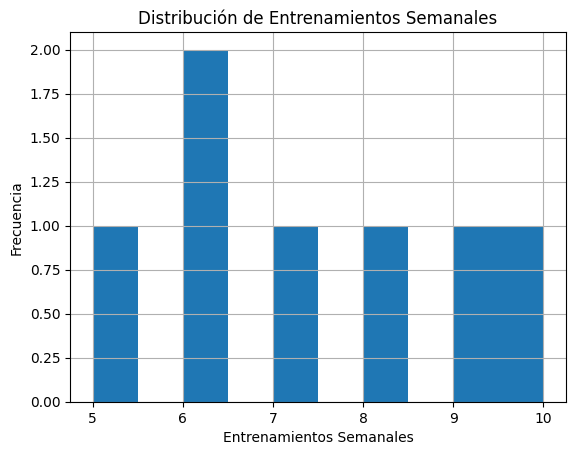

In [8]:
df['Entrenamientos_Semanales'].hist()
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Entrenamientos Semanales')
plt.show()

In [10]:
df.dtypes

,0
Atleta,object
Edad,int64
Altura_cm,int64
Peso_kg,int64
Deporte,object
Entrenamientos_Semanales,int64
Medallas_Totales,int64
Pais,object


In [14]:
mean_medallas = df['Medallas_Totales'].mean()
median_medallas = df['Medallas_Totales'].median()
mode_medallas = df['Medallas_Totales'].mode()

print('Medallas Totales')
print('Media:', mean_medallas)
print('Mediana:', median_medallas)
print('Moda:', mode_medallas[0])

Medallas Totales
Media: 8.571428571428571
Mediana: 7.0
Moda: 3


In [18]:
dev_altura = df['Altura_cm'].std()
print(f'Desviación Altura en cm: {dev_altura:.2f}')

Desviación Altura en cm: 18.72


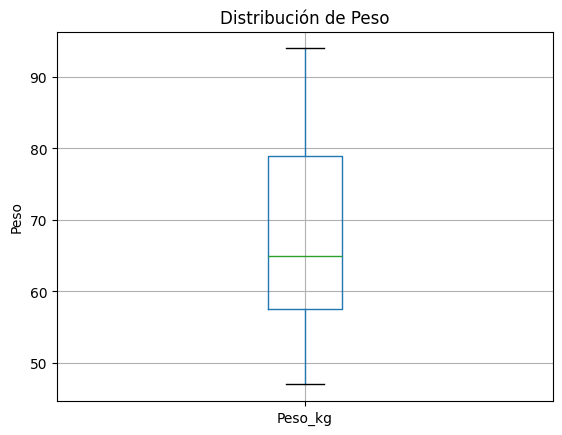

In [21]:
df.boxplot(column='Peso_kg')
plt.ylabel('Peso')
plt.title('Distribución de Peso')
plt.show()

In [25]:
correlacion_pearson = df['Entrenamientos_Semanales'].corr(df['Medallas_Totales'], method='pearson')
print(f'La correlación entre entrenamiento y medallas es de {correlacion_pearson:.2f}')

La correlación entre entrenamiento y medallas es de 0.57


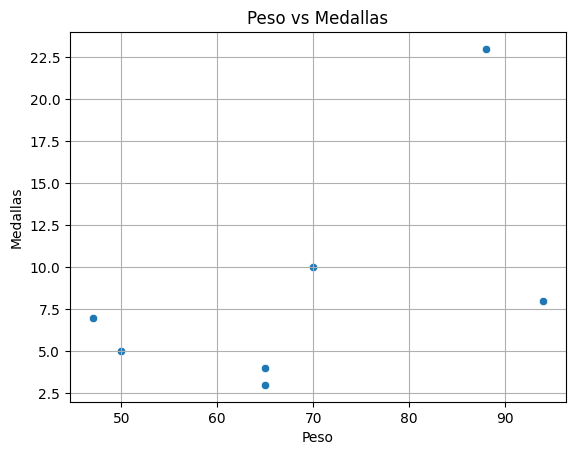

La correlación entre peso y medallas es de 0.56


In [29]:
sns.scatterplot(x='Peso_kg', y='Medallas_Totales', data=df)
plt.xlabel('Peso')
plt.ylabel('Medallas')
plt.title('Peso vs Medallas')
plt.grid()
plt.show()

correlacion_pearson2 = df['Peso_kg'].corr(df['Medallas_Totales'], method='pearson')
print(f'La correlación entre peso y medallas es de {correlacion_pearson2:.2f}')

Coeficiente de regresión (m): 2.15
Intercepción (b): -7.12
Interpretación: Por cada entrenamiento semanal adicional, se espera un aumento de 2.15 en el número de medallas totales.
Coeficiente de determinación (R²): 0.32
Interpretación del R²: El 32.47% de la variabilidad en las Medallas Totales puede ser explicado por el número de Entrenamientos Semanales.


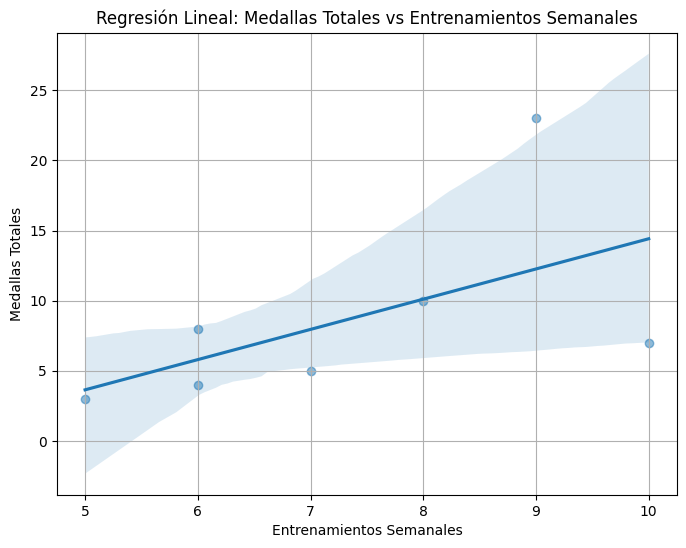

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Preparar los datos
X = df[['Entrenamientos_Semanales']]
y = df['Medallas_Totales']

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y) # Usamos todos los datos para entrenar en este caso simple

# Obtener e interpretar los coeficientes
coeficiente = model.coef_[0]
intercepcion = model.intercept_

print(f'Coeficiente de regresión (m): {coeficiente:.2f}')
print(f'Intercepción (b): {intercepcion:.2f}')
print(f'Interpretación: Por cada entrenamiento semanal adicional, se espera un aumento de {coeficiente:.2f} en el número de medallas totales.')

# Realizar predicciones (en este caso, predecimos sobre los mismos datos para calcular R^2)
y_pred = model.predict(X)

# Calcular el R^2
r2 = r2_score(y, y_pred)
print(f'Coeficiente de determinación (R²): {r2:.2f}')
print(f'Interpretación del R²: El {r2*100:.2f}% de la variabilidad en las Medallas Totales puede ser explicado por el número de Entrenamientos Semanales.')


# Graficar la regresión lineal usando Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Medallas Totales')
plt.title('Regresión Lineal: Medallas Totales vs Entrenamientos Semanales')
plt.grid(True)
plt.show()


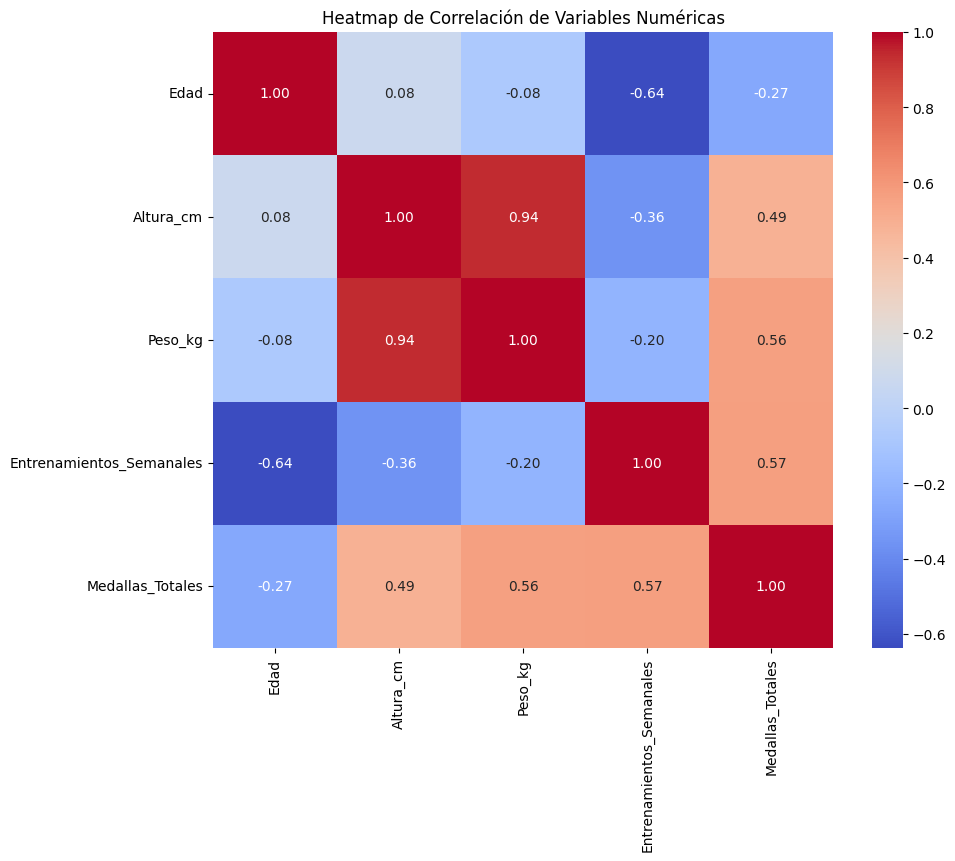

In [32]:
df_numeric = df.select_dtypes(include=np.number)
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación de Variables Numéricas')
plt.show()

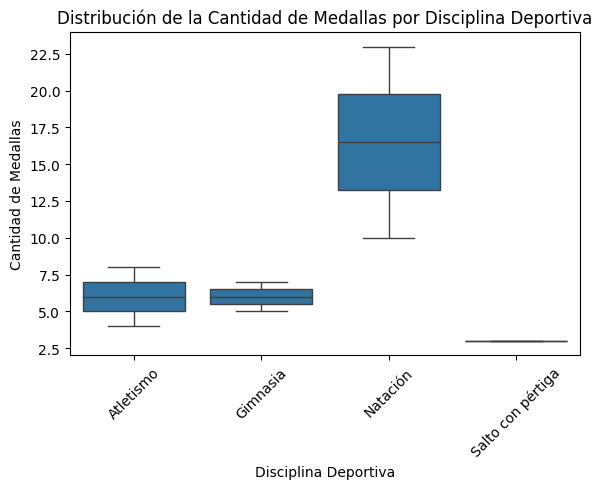

In [39]:
plt.figure(figsize=(6, 5)) # Ajusta el tamaño de la figura si hay muchas disciplinas
sns.boxplot(x='Deporte', y='Medallas_Totales', data=df)
plt.xlabel('Disciplina Deportiva')
plt.ylabel('Cantidad de Medallas')
plt.title('Distribución de la Cantidad de Medallas por Disciplina Deportiva')
plt.xticks(rotation=45) # Rota las etiquetas del eje x para que sean legibles si hay muchas
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()